# Exercise Review: Natural Language Processing - ACQUIRE - WEB SCRAPING

<a href = "https://ds.codeup.com/nlp/acquire/#exercises">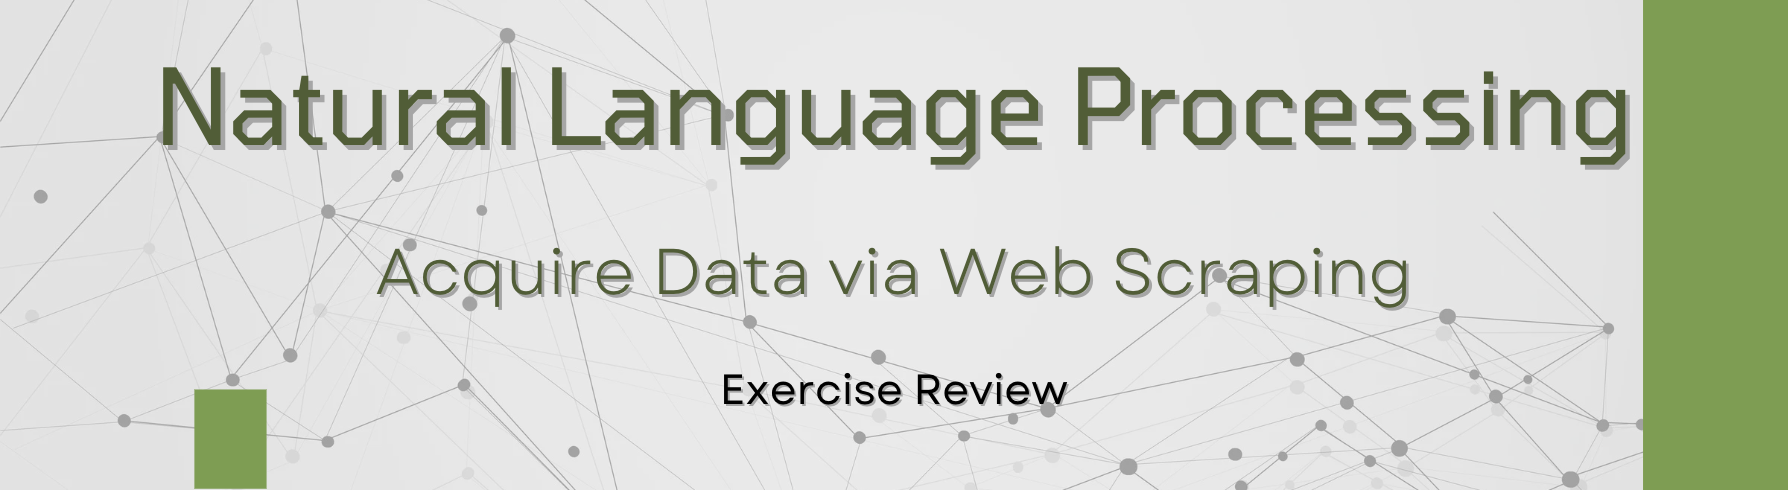</a>

In [1]:
#Import dependencies
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import re
import os
import json

By the end of this exercise, you should have a file named `acquire.py` that contains the specified functions. If you wish, you may break your work into separate files for each website (e.g. `acquire_codeup_blog.py` and `acquire_news_articles.py`), but the end function should be present in `acquire.py` (that is, `acquire.py` should `import get_blog_articles` from the `acquire_codeup_blog` module.)

# 1. Codeup Blog Articles

Visit <a href="https://codeup.com/blog/">Codeup's Blog</a> and record the urls for **at least 5 distinct blog posts**. For each post, you should scrape at least the post's title and content.

Encapsulate your work in a function named `get_blog_articles` that will return a list of dictionaries, with each dictionary representing one article. The shape of each dictionary should look like this:


```
{
    'title': 'the title of the article',
    'content': 'the full text content of the article'
}
```


Plus any additional properties you think might be helpful.

Bonus: Scrape the text of all the articles linked on codeup's blog page.

In [2]:
#Define headers
headers = {'User-Agent': 'Codeup Data Science'}

In [3]:
#scrape blog homepage for links

url = "https://codeup.com/blog/"

response = get(url, headers = headers)

soup = BeautifulSoup(response.content, 'html.parser')

more_links = soup.find_all('a', class_="more-link")

more_links

[<a class="more-link" href="https://codeup.com/featured/apida-heritage-month/">read more</a>,
 <a class="more-link" href="https://codeup.com/featured/women-in-tech-panelist-spotlight/">read more</a>,
 <a class="more-link" href="https://codeup.com/featured/women-in-tech-rachel-robbins-mayhill/">read more</a>,
 <a class="more-link" href="https://codeup.com/codeup-news/women-in-tech-panelist-spotlight-sarah-mellor/">read more</a>,
 <a class="more-link" href="https://codeup.com/events/women-in-tech-madeleine/">read more</a>,
 <a class="more-link" href="https://codeup.com/codeup-news/panelist-spotlight-4/">read more</a>]

In [4]:
#extract the links into a list

links_list = [link['href'] for link in more_links]
links_list

['https://codeup.com/featured/apida-heritage-month/',
 'https://codeup.com/featured/women-in-tech-panelist-spotlight/',
 'https://codeup.com/featured/women-in-tech-rachel-robbins-mayhill/',
 'https://codeup.com/codeup-news/women-in-tech-panelist-spotlight-sarah-mellor/',
 'https://codeup.com/events/women-in-tech-madeleine/',
 'https://codeup.com/codeup-news/panelist-spotlight-4/']

In [7]:
#make a request

response = get(links_list[3], headers = headers)
#response.text

In [9]:
#create soup and get title
soup = BeautifulSoup(response.content,  'html.parser')
title = soup.find('h1')
title.text

'Women in Tech: Panelist Spotlight – Sarah Mellor'

In [11]:
#getting the published date
pdate = soup.find('span', class_="published")
pdate.text

'Mar 13, 2023'

In [16]:
#get the article content
artcont = soup.find('div', class_="entry-content")
artcont.text

'\nWomen in tech: Panelist Spotlight – Sarah Mellor\xa0\nCodeup is hosting a Women in Tech Panel in honor of Women’s History Month on March 29th, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as women in the tech industry!\nMeet Sarah!\nSarah Mellor currently works as the Director of People Operations. She joined Codeup four and a half years ago as an Admissions Manager. She went on to build out and lead the Marketing and Admissions team, while picking up People Ops tasks and projects here and there until moving over to lead the People Ops team two years ago. Prior to Codeup, she worked at education-focused non-profits in Washington, DC and Boulder, Colorado. She graduated from Wake Forest University.\nWe asked Sarah how Codeup has impacted her career, and her response was “I have absolutely loved having the privilege to grow alongside Codeup. In my time here across multiple differ

In [17]:
#loop through the link to collect all of the articles' info
headers = {'User-Agent': 'Codeup Data Science'}
article_info = []

for link in links_list:
    response = get(link, headers=headers)
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    info_dict = {"title":soup.find("h1").text,
                "link": link,
                "date_published":soup.find('span', class_="published").text,
                "content": soup.find('div', class_="entry-content").text}
    article_info.append(info_dict)
    
article_info[0]

{'title': 'Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa',
 'link': 'https://codeup.com/featured/apida-heritage-month/',
 'date_published': 'May 24, 2023',
 'content': '\nMay is traditionally known as Asian American and Pacific Islander (AAPI) Heritage Month. This month we celebrate the history and contributions made possible by our AAPI friends, family, and community. We also examine our level of support and seek opportunities to better understand the AAPI community.\n\nIn an effort to address real concerns and experiences, we sat down with Arbeena Thapa, one of Codeup’s Financial Aid and Enrollment Managers.\nArbeena identifies as Nepali American and Desi. Arbeena’s parents immigrated to Texas in 1988 for better employment and educational opportunities. Arbeena’s older sister was five when they made the move to the US. Arbeena was born later, becoming the first in her family to be a US citizen.\nAt Codeup we take our efforts at inclusivity ver

In [19]:
def get_blog_articles(article_list):
    """
    
    """
    file = "blog_posts.json"
    
    if os.path.exists(file):
        with open(file) as f:
            return json.load(f)
        
    
    headers = {'User-Agent': 'Codeup Data Science'}
    article_info = []

    for article in article_list:
        response = get(article, headers=headers)

        soup = BeautifulSoup(response.content, 'html.parser')

        info_dict = {"title":soup.find("h1").text,
                    "link": article,
                    "date_published":soup.find('span', class_="published").text,
                    "content": soup.find('div', class_="entry-content").text}
        article_info.append(info_dict)
    
    with open(file, "w") as f:
        json.dump(article_info, f)
    return article_info

In [20]:
#check funct works

article_info = get_blog_articles(links_list)
article_info[0]

{'title': 'Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa',
 'link': 'https://codeup.com/featured/apida-heritage-month/',
 'date_published': 'May 24, 2023',
 'content': '\nMay is traditionally known as Asian American and Pacific Islander (AAPI) Heritage Month. This month we celebrate the history and contributions made possible by our AAPI friends, family, and community. We also examine our level of support and seek opportunities to better understand the AAPI community.\n\nIn an effort to address real concerns and experiences, we sat down with Arbeena Thapa, one of Codeup’s Financial Aid and Enrollment Managers.\nArbeena identifies as Nepali American and Desi. Arbeena’s parents immigrated to Texas in 1988 for better employment and educational opportunities. Arbeena’s older sister was five when they made the move to the US. Arbeena was born later, becoming the first in her family to be a US citizen.\nAt Codeup we take our efforts at inclusivity ver

# 2. News Articles

We will now be scraping text data from <a href = "https://inshorts.com/">inshorts</a>, a website that provides a brief overview of many different topics.

Write a function that scrapes the news articles for the following topics:

- Business
- Sports
- Technology
- Entertainment

The end product of this should be a function named get_news_articles that returns a list of dictionaries, where each dictionary has this shape:


```
{
    'title': 'The article title',
    'content': 'The article content',
    'category': 'business' # for example
}
```

***Hints:***

- Start by inspecting the website in your browser. Figure out which elements will be useful.
- Start by creating a function that handles a single article and produces a dictionary like the one above.
- Next create a function that will find all the articles on a single page and call the function you created in the last step for every article on the page.
- Now create a function that will use the previous two functions to scrape the articles from all the pages that you need, and do any additional processing that needs to be done.

In [22]:
response2 = get("https://inshorts.com/en/read/business")
soup2 = BeautifulSoup(response2.content, 'html.parser')
soup2.text[:400]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBusiness News: World and India Business News in English with Inshorts\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ntoggle menuMenu\n\n\n\n\n\n\n\n\xa0\n\n\n\n\n\nEnglish\nहिन्दी\n\n\n\nCategories\n\n All News \n India \n Business \n Sports \n World \n Politics \n Technology \n Startup \n Entertainment \n Miscellaneous \n Hatke \n Science \n Automobile \n\n\n\n\n\n\n\n\n\n\n\n\n          For the best experienc'

In [25]:
#access titles

titles = soup2.find_all("span", itemprop="headline")
titles

[<span itemprop="headline">Sensex, Nifty end at fresh closing highs</span>,
 <span itemprop="headline">TIME releases list of the world's 100 most influential companies</span>,
 <span itemprop="headline">Which are the world's top 10 airlines according to passengers?</span>,
 <span itemprop="headline">Loves India, is a fan of PM: Paytm Founder on Musk after Modi meet</span>,
 <span itemprop="headline">UK's net debt passes 100% of GDP for the first time since 1961</span>,
 <span itemprop="headline">Mcap of BSE-listed firms hits fresh record high of ₹294.5 lakh cr</span>,
 <span itemprop="headline">McD employees, customer throw drinks at each other in Aus; company responds</span>,
 <span itemprop="headline">Sylvester daCunha, the man behind iconic Amul girl, passes away</span>,
 <span itemprop="headline">OLX Group fires 800 employees globally: Report</span>,
 <span itemprop="headline">Yoga a global product made in India: Zerodha CEO Nithin Kamath</span>,
 <span itemprop="headline">Yoga hel

In [28]:
#get summaries

summaries = soup2.find_all('div', itemprop="articleBody")
summaries[0]

<div itemprop="articleBody">Benchmark indices Sensex and Nifty ended at record closing highs on Wednesday. Sensex ended 195 points higher at 63,523 while the Nifty ended at 18,856.85, up 40 points. The gains were led by stocks like HDFC, Reliance Industries and TCS. During the intraday trade, Sensex rose to its fresh record high level of 63,588. </div>

In [29]:
#make sure that we have an equal # of titles and summaries

len(titles), len(summaries)

(25, 25)

In [31]:
def scrape_one_page(topic):
#topic = "business"
    base_url = "https://inshorts.com/en/read/"

    response = get(base_url + topic)

    soup = BeautifulSoup(response.content, 'html.parser')

    titles = soup.find_all('span', itemprop="headline")

    summaries = soup.find_all('div', itemprop="articleBody")

    summary_list = []

    for i in range(len(titles)):
        temp_dict = {"category": topic,
                    "title": titles[i].text,
                    "content": summaries[i].text}

        summary_list.append(temp_dict)

    return summary_list

In [33]:
business_test = scrape_one_page("business")
business_test[0]

{'category': 'business',
 'title': 'Sensex, Nifty end at fresh closing highs',
 'content': 'Benchmark indices Sensex and Nifty ended at record closing highs on Wednesday. Sensex ended 195 points higher at 63,523 while the Nifty ended at 18,856.85, up 40 points. The gains were led by stocks like HDFC, Reliance Industries and TCS. During the intraday trade, Sensex rose to its fresh record high level of 63,588. '}

In [35]:
def get_news_articles(topic_list):
    """
    
    """
    file = "news_articles.json"
    if os.path.exists(file):
        with open(file) as f:
            return json.load(f)

    final_list = []

    for topic in topic_list:
        final_list.extend(scrape_one_page(topic))
    
    with open(file, "w") as f:
        json.dump(final_list, f)
        
    return final_list

In [40]:
#Test my function!
topics = ['business', 'sports', 'technology', 'entertainment']

final_list = get_news_articles(topics)
final_list[50]

{'category': 'technology',
 'title': "Elon Musk meets PM Modi, says 'I am a fan of Modi'",
 'content': 'Tesla CEO and Twitter owner Elon Musk met Prime Minister Narendra Modi in New York on Tuesday. "I am a fan of Modi...I like him quite a lot," Musk said. "PM Modi really cares about India because he is pushing us to make significant investment in India, which is something that we tend to do," he further said.'}

In [41]:
len(final_list)

100

In [42]:
# turn that bad boy into a df

final_df = pd.DataFrame(final_list)
final_df

,category,title,content
0,business,"Sensex, Nifty end at fresh closing highs",Benchmark indices Sensex and Nifty ended at re...
1,business,TIME releases list of the world's 100 most inf...,TIME magazine has released its annual list of ...
2,business,Which are the world's top 10 airlines accordin...,Singapore Airlines is the world's best airline...
3,business,"Loves India, is a fan of PM: Paytm Founder on ...",Paytm Founder Vijay Shekhar Sharma shared a vi...
4,business,UK's net debt passes 100% of GDP for the first...,The United Kingdom's public sector net debt in...
...,...,...,...
95,entertainment,It was hard to find 300 transgender people for...,Producer Sanjay Saha said that finding 300 tra...
96,entertainment,"Looks aren't important for me, one should know...",Actor Gautam Gulati said looks are not importa...
97,entertainment,"Of course, why not: Gautam Gulati on if he wou...","Actor Gautam Gulati, when asked if he would ev..."
98,entertainment,"When Prateik smiles, he looks exactly like Smi...","Actress Shabana Azmi said it was ""deeply emoti..."


In [43]:
pd.set_option("display.max_colwidth", None)

In [44]:
final_df

,category,title,content
0,business,"Sensex, Nifty end at fresh closing highs","Benchmark indices Sensex and Nifty ended at record closing highs on Wednesday. Sensex ended 195 points higher at 63,523 while the Nifty ended at 18,856.85, up 40 points. The gains were led by stocks like HDFC, Reliance Industries and TCS. During the intraday trade, Sensex rose to its fresh record high level of 63,588."
1,business,TIME releases list of the world's 100 most influential companies,"TIME magazine has released its annual list of the world's 100 most influential companies, which features OpenAI, SpaceX, Chess.com, Google DeepMind and Kim Kardashian's SKIMS among others. The National Payments Corporation of India (NPCI) and e-commerce platform Meesho also featured on the list. ""NPCI launched UPI...which accounted for 52% of India's digital transactions in FY22,"" TIME said."
2,business,Which are the world's top 10 airlines according to passengers?,"Singapore Airlines is the world's best airline, according to Skytrax World Airline Awards 2023, an annual poll of flyers released at the Paris Air Show. It is followed by Qatar Airways, All Nippon Airways, Emirates, Japan Airlines, Turkish Airlines, Air France, Cathay Pacific, EVA Air, and Korean Air. Vistara, ranked 16th, is the only Indian airline in the top 20."
3,business,"Loves India, is a fan of PM: Paytm Founder on Musk after Modi meet","Paytm Founder Vijay Shekhar Sharma shared a video of Tesla CEO Elon Musk's media interaction after meeting with PM Modi and wrote, ""Musk may be in India, next year."" In another tweet, Sharma said, ""He [Musk] won't find population problem in India. Finds clean energy, energy storage and EVs as great potential...Loves India and is a fan of our PM."""
4,business,UK's net debt passes 100% of GDP for the first time since 1961,"The United Kingdom's public sector net debt in May exceeded 100% of the nation's GDP for the first time since 1961, the UK government's Office for National Statistics said on Wednesday. Public sector net debt, excluding that of state-controlled banks, hit £2.567 trillion, equivalent to 100.1% of the UK's GDP. The UK government's borrowing in May totalled £20.045 billion.\n\n"
...,...,...,...
95,entertainment,It was hard to find 300 transgender people for 'Haddi': Producer,"Producer Sanjay Saha said that finding 300 transgender people for Nawazuddin Siddiqui's 'Haddi' was ""very adventurous and hard"". He added that a transwoman named Renuka helped the filmmakers to learn about transgender community. ""She had brought some of her friends from the community to Nawaz so that he could get into the character and deeply understand their life,"" he added."
96,entertainment,"Looks aren't important for me, one should know how to talk: Gautam","Actor Gautam Gulati said looks are not important for him to feel attracted to a person and that one should know how to talk. ""A person should know...how to hold a conversation for hours...I love people like that...I love that energy...This is what attracts me to people...I'm not just talking about a woman, I'm also talking about guys,"" he added."
97,entertainment,"Of course, why not: Gautam Gulati on if he would ever date a fan","Actor Gautam Gulati, when asked if he would ever date a fan, said, ""Of course, why not."" He also said that if he had to change his name, he would change it to 'Kabir' because he likes the name. He added that he loves his routine and says no to anyone asking him to go out for food or drinks."
98,entertainment,"When Prateik smiles, he looks exactly like Smita Patil: Shabana","Actress Shabana Azmi said it was ""deeply emotional"" for her to shoot with Smita Patil's son Prateik Patil Babbar. ""He bears an uncanny resemblance to Smita. When he smiles, he looks exactly like her,"" shared the actress who featured with Smita Patil in films such as 'Arth', 'Mandi' and others. ""Prateik is a disciplined actor,"" Azmi added."
